## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

## Reading the dataset 


In [2]:
zomato_r=pd.read_csv('D:\zomato.csv') #Here, we have read the dataset
zomato_r.head(10)     

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   
5  https://www.zomato.com/bangalore/timepass-dinn...   
6  https://www.zomato.com/bangalore/rosewood-inte...   
7  https://www.zomato.com/bangalore/onesta-banash...   
8  https://www.zomato.com/bangalore/penthouse-caf...   
9  https://www.zomato.com/bangalore/smacznego-ban...   

                                             address  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2  1112, Next to KIMS Medical College, 17th Cross...   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6  19/1, New Timberyard Layout, Beside Satellite ...   
7  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9  2470, 21 Main Road, 25th Cross, Banashankari, ...   

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes                             phone      location  \
0  4.1/5    775    080 42297555\r\n+91 9743772233  Banashankari   
1  4.1/5    787                      080 41714161  Banashankari   
2  3.8/5    918                    +91 9663487993  Banashankari   
3  3.7/5     88                    +91 9620009302  Banashankari   
4  3.8/5    166  +91 8026612447\r\n+91 9901210005  Basavanagudi   
5  3.8/5    286  +91 9980040002\r\n+91 9980063005  Basavanagudi   
6  3.6/5      8    +91 9731716688\r\n080 26740366   Mysore Road   
7  4.6/5   2556      080 48653961\r\n080 48655715  Banashankari   
8  4.0/5    324  +91 8884135549\r\n+91 9449449316  Banashankari   
9  4.2/5    504  +91 9945230807\r\n+91 9743804471  Banashankari   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   
5        Casual Dining  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   
6        Casual Dining                                                NaN   
7  Casual Dining, Cafe  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
8                 Cafe  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
9                 Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   

                                      cuisines approx_cost(for two people)  \
0               North Indian, Mughlai, Chinese                         800   
1                  Chinese, North Indian, Thai                         800   
2                       Cafe, Mexican, Italian                         800   
3                   South Indian, North Indian            

In [3]:
zomato_r.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
zomato_r.shape    #showing shape(Rows,columns) of the dataset

(51717, 17)

In [5]:
zomato_r.dtypes   #showing data type of each column

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
zomato_r.describe(include='all') #Description of data in the dataframe and showing some descriptive stats

url        address  \
count                                               51717          51717   
unique                                              51717          11495   
top     https://www.zomato.com/bangalore/jalsa-banasha...  Delivery Only   
freq                                                    1            128   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                   name online_order book_table   rate         votes  \
count             51717        51717      51717  43942  51717.000000   
unique             8792            2          2     64           NaN   
top     Cafe Coffee Day          Yes         No    NEW           NaN   
freq                 96        30444      45268   2208           NaN   
mean                NaN          NaN        NaN    NaN    283.697527   
std                 NaN          NaN        NaN    NaN    803.838853   
min                 NaN          NaN        NaN    NaN      0.000000   
25%                 NaN          NaN        NaN    NaN      7.000000   
50%                 NaN          NaN        NaN    NaN     41.000000   
75%                 NaN          NaN        NaN    NaN    198.000000   
max                 NaN          NaN        NaN    NaN  16832.000000   

               phone location    rest_type dish_liked      cuisines  \
count          50509    51696        51490      23639         51672   
unique         14926       93           93       5271          2723   
top     080 43334321      BTM  Quick Bites    Biryani  North Indian   
freq             216     5124        19132        182          2913   
mean             NaN      NaN          NaN        NaN           NaN   
std              NaN      NaN          NaN        NaN           NaN   
min              NaN      NaN          NaN        NaN           NaN   
25%              NaN      NaN          NaN        NaN           NaN   
50%              NaN      NaN          NaN        NaN           NaN   
75%              NaN      NaN          NaN        NaN           NaN   
max              NaN      NaN          NaN        NaN           NaN   

       approx_cost(for two people) reviews_list menu_item listed_in(type)  \
count                        51371        51717     51717           51717   
unique                          70        22513      9098               7   
top                            300           []        []        Delivery   
freq                          7576         7595     39617           25942   
mean                           NaN          NaN       NaN             NaN   
std                            NaN          NaN       NaN             NaN   
min                            NaN          NaN       NaN             NaN   
25%                            NaN          NaN       NaN             NaN   
50%                            NaN          NaN       NaN             NaN   
75%                            NaN          NaN       NaN             NaN   
max                            NaN          NaN       NaN             NaN   

       listed_in(city)  
count            51717  
unique              30  
top                BTM  
freq              3279  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

## Data cleaning

In [7]:
#Dropping/removing unnecessary columns like url and phone which are not as important to get to the conclusion
zomato=zomato_r.drop(['url','phone'],axis=1)   

In [8]:
zomato.head() 

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [9]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)   

In [10]:
zomato.head()  

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [11]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)   

In [12]:
zomato.columns #Showing all the remaining columns in the dataset

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns 

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [14]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23395 non-null  object 
 1   name          23395 non-null  object 
 2   online_order  23395 non-null  object 
 3   book_table    23395 non-null  object 
 4   rate          23395 non-null  object 
 5   votes         23395 non-null  int64  
 6   location      23395 non-null  object 
 7   rest_type     23395 non-null  object 
 8   dish_liked    23395 non-null  object 
 9   cuisines      23395 non-null  object 
 10  cost          23395 non-null  float64
 11  reviews_list  23395 non-null  object 
 12  menu_item     23395 non-null  object 
 13  type          23395 non-null  object 
 14  city          23395 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.9+ MB


In [15]:
zomato['rate'].unique() 

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
#Removing '/5' from Rates to make it easier to process and compare data to retrieve useful information with the help of their ratings
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()    

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [17]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique() 

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1350.,
       2200., 1400., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [18]:
## Checking Null values
zomato.isnull().sum() 

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

## Data Understanding

Filtering out all the restaurants having votes more than 15000 in whole bangalore which shows that these are the most loved restaurant in the city and zomato can recommend these places to more people and which will help it in its business expansion.
Like, Byg Brewski Brewing Company is the most loved restaurant having highest number of votes in the city.

In [19]:
abc = zomato.loc[zomato['votes'] > 15000] 
abc.filter(['name','rate','votes','average_cost','locality'])  

name  rate  votes
1638   Byg Brewski Brewing Company   4.9  16345
1928   Byg Brewski Brewing Company   4.9  16345
2001   Byg Brewski Brewing Company   4.9  16345
22283  Byg Brewski Brewing Company   4.9  16832
22418  Byg Brewski Brewing Company   4.9  16832
22584  Byg Brewski Brewing Company   4.9  16832

Similarly, here we have filtered all the restaurants having rating more than 4.7 which shows that these are the most highly rated restaurants in the city and zomato can recommend these places to more people and which will help it in its business expansion. Brahmin'S Coffee Bar, The Black Pearl, Byg Brewski Brewing Company	, etc. are some of the highly rated restaurants in the region.

In [20]:
zomato['rate'] = zomato['rate'].astype(float)
rslt_df = zomato.loc[zomato['rate'] > 4.7] 
rslt_df.filter(['name','rate','average_cost','locality'])  

name  rate
1337          Brahmin'S Coffee Bar   4.8
1534               The Black Pearl   4.8
1638   Byg Brewski Brewing Company   4.9
1927               The Black Pearl   4.8
1928   Byg Brewski Brewing Company   4.9
...                            ...   ...
22584  Byg Brewski Brewing Company   4.9
22716                 Punjab Grill   4.8
22950    Ab'S - Absolute Barbecues   4.8
22951                     Flechazo   4.9
22957                 Punjab Grill   4.8

[121 rows x 2 columns]

These are the most liked dishes in the region. People prefer dishes like Biryani, waffles, masala dosa etc. more. Zomato can invest more in the restaurants serving these dishes.

In [21]:
count = zomato['dish_liked'].value_counts()
count 

Biryani                                                                                                                 179
Friendly Staff                                                                                                           68
Waffles                                                                                                                  67
Chicken Biryani                                                                                                          66
Masala Dosa                                                                                                              56
                                                                                                                       ... 
Tea, Coffee, Kadala Curry, Chicken Dum Biryani, Shawarma, Ghee Rice, Chicken Kebab                                        1
Gulab Jamun, Mint Raita, Mutton Biryani, Basmati Rice, Paneer Subz Biryani, Gosht Dum Biryani                             1
Garlic B

Text(0.5, 1.0, 'Most liked dishes')

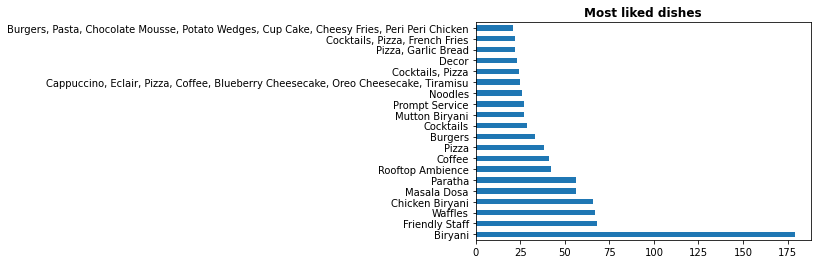

In [22]:
zomato['dish_liked'].value_counts()[:20].plot(kind='barh')
plt.title("Most liked dishes",fontweight="bold")  

This graph depicts that most of the population (more than 16000 people) likes to order food online rather than dine-out or anything else which shows a bright sign for the company.

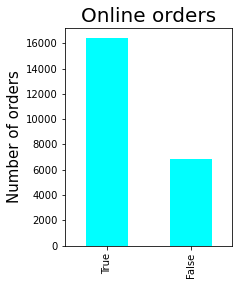

In [23]:
plt.rcParams['figure.figsize'] = (3, 4)


zomato['online_order'].value_counts().plot.bar(color = 'cyan')
plt.title('Online orders', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 15)
plt.show()  

This pie chart depicts that a large part of population loves desserts in the region. So, zomato can focus on increasing sales and grabbing new customers by giving offers and discounts on desserts.

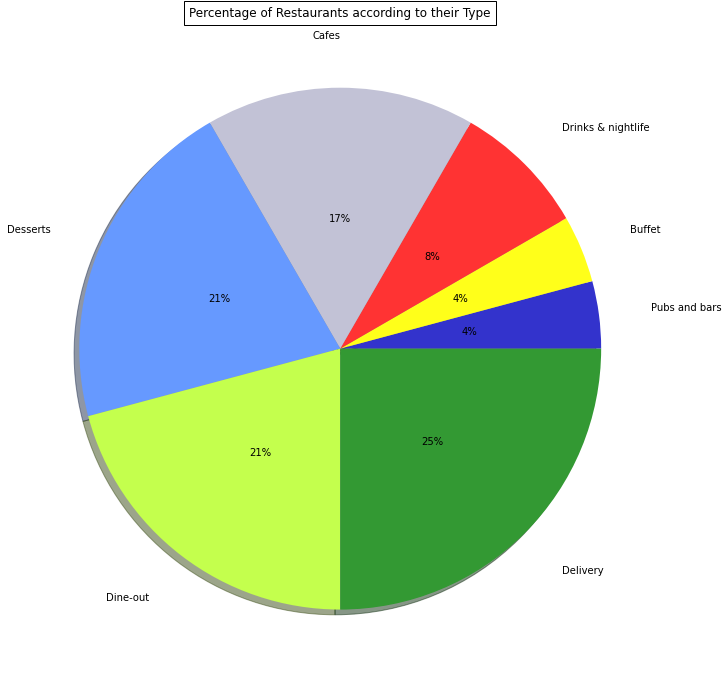

In [24]:
restaurantTypeCount=zomato['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(12,12)
plt.show()  

<AxesSubplot:>

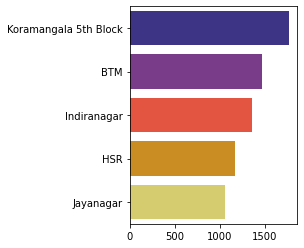

In [25]:
#Top 5 places to eat in bangalore
top_5_loc = zomato.location.value_counts().nlargest(5)
sns.barplot(y=top_5_loc.index, x=top_5_loc.values, palette="CMRmap")  

<AxesSubplot:>

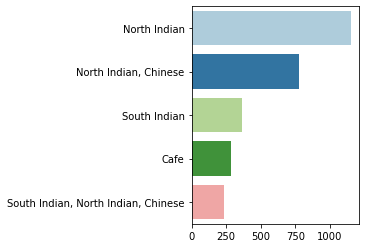

In [26]:
#Top 5 most liked cuisines in the region
top_5_cui = zomato.cuisines.value_counts().nlargest(5)
sns.barplot(y=top_5_cui.index, x=top_5_cui.values, palette="Paired")  

In [27]:
kkb=zomato.loc[zomato['cost']>1000]
kkb.filter(['name','rate','cost','city'])    

name  rate    cost  \
47                                    Gustoes Beer House   4.1  1200.0   
74                                             Patio 805   4.1  1200.0   
100                                        Chutney Chang   4.1  1500.0   
106                                              Toscano   4.3  1300.0   
135                          Gufha - The President Hotel   4.1  1200.0   
...                                                  ...   ...     ...   
23242                                            Smaaash   4.0  1500.0   
23243                                 Izakaya Gastro Pub   3.8  1200.0   
23244        M Bar - Bengaluru Marriott Hotel Whitefield   3.9  2000.0   
23245                             Keys Cafe - Keys Hotel   2.8  1200.0   
23247  Chime - Sheraton Grand Bengaluru Whitefield Ho...   4.3  2500.0   

               city  
47     Banashankari  
74     Banashankari  
100    Banashankari  
106    Banashankari  
135    Banashankari  
...             ...  
23242    Whitefield  
23243    Whitefield  
23244    Whitefield  
23245    Whitefield  
23247    Whitefield  

[4728 rows x 4 columns]

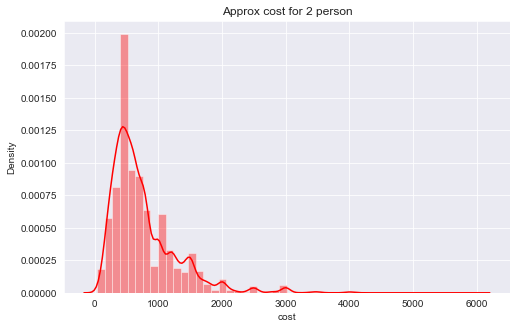

In [28]:
#Most of the restaurants have average cost less than 1000 for 2 people
costdata=zomato['cost'].dropna()
plt.figure(figsize=(8,5));
sns.set_style("darkgrid");
sns.distplot(costdata,color='red');  
plt.title('Approx cost for 2 person'); 

In [29]:
# Average rating of restaurants in a particular location
IN_loc=zomato['location'].value_counts().to_frame().reset_index()
IN_loc.columns=['location','count']
INloc_ratings=zomato.groupby(['location'])['rate'].mean().to_frame().reset_index()
INloc_ratings.columns=['location','avgrate']
IN_locrate=pd.merge(IN_loc,INloc_ratings,on="location")
IN_locrate[:5]

location  count   avgrate
0  Koramangala 5th Block   1776  4.151351
1                    BTM   1472  3.766168
2            Indiranagar   1355  3.963838
3                    HSR   1170  3.839573
4              Jayanagar   1060  3.935189

In [30]:
import plotly.express as px
INfig2=px.bar(IN_locrate.round(2)[:10],x='location',y="avgrate",color='avgrate',hover_data=['count'],text='avgrate',title='<b>Location wise Avg rate</b>')  #
#INfig2.update_traces(textfont_size=12,textposition="inside",textangle=90,)
INfig2.update_layout(autosize=False,width=700,height=500,xaxis_title="Locations Situated",yaxis_range=[3,5],xaxis = dict(tickfont = dict(size=12)))

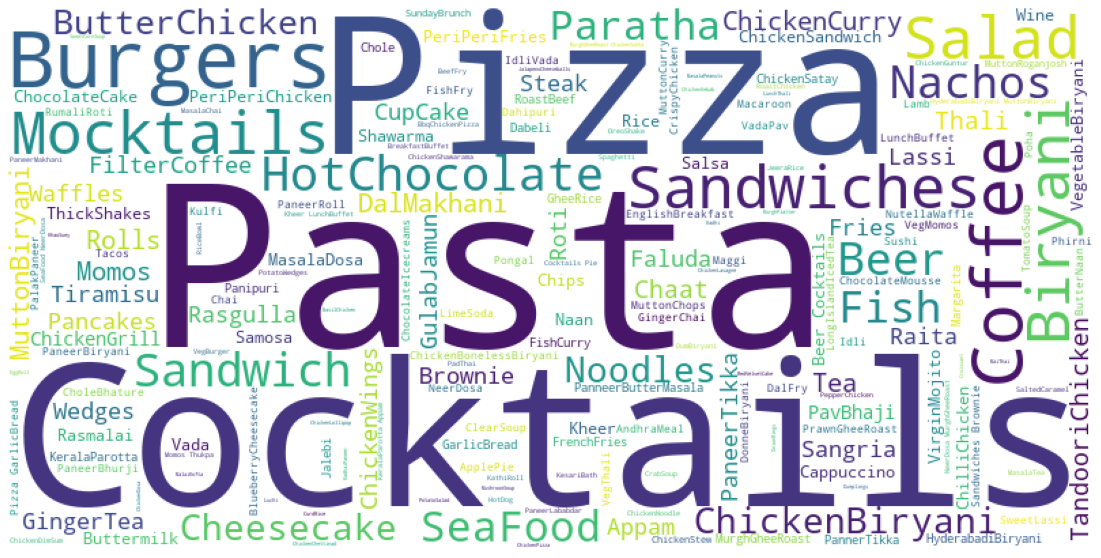

In [31]:
from wordcloud import WordCloud
Top_rest=zomato[(zomato['city']=='Koramangala')|(zomato['city']=='Indiranagar')|(zomato['city']=='Santhala Nagar')].sort_values('rate',ascending=False).dropna()
Dishliked=' '.join((dish for dish in Top_rest.dish_liked.str.replace(';', ' ').str.replace(' ','').str.replace(',', ' ')))
dc=WordCloud(width=800, height=400, background_color='white').generate(Dishliked)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.grid(False)
plt.imshow(dc);  

## Rating prediction  System 

In [32]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

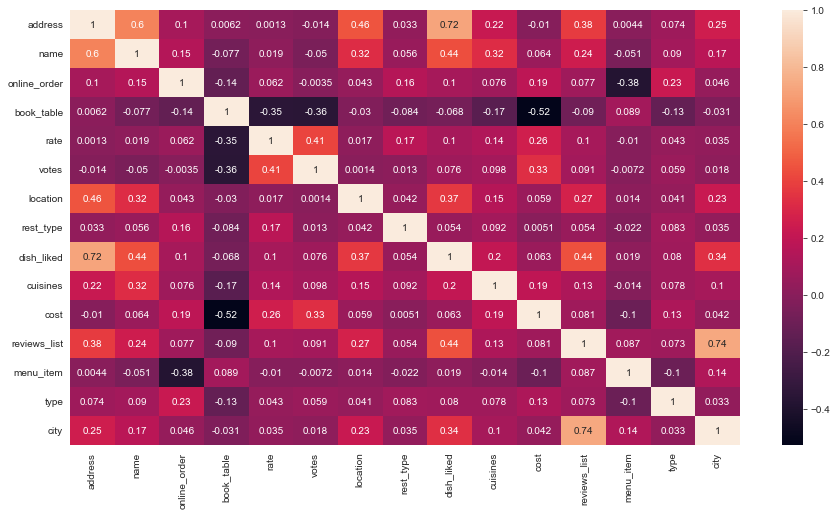

In [33]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

In [34]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,5,6,7,8,9,11,10]]
y = zomato_en['rate']
x


online_order  votes  location  rest_type  dish_liked  cuisines  \
0                 0    775         0          0           0         0   
1                 0    787         0          0           1         1   
2                 0    918         0          1           2         2   
3                 1     88         0          2           3         3   
4                 1    166         1          0           4         4   
...             ...    ...       ...        ...         ...       ...   
23243             0    128        49         33        1797       856   
23244             1     77        49         58          55       161   
23245             1    161        49         15        1569       777   
23246             1     81        49         15        5193       503   
23247             1    236        50         10        5189       161   

       reviews_list    cost  
0                 0   800.0  
1                 1   800.0  
2                 2   800.0  
3                 3   300.0  
4                 4   600.0  
...             ...     ...  
23243          2469  1200.0  
23244          2201  2000.0  
23245          2203  1200.0  
23246         14055   800.0  
23247         14031  2500.0  

[23248 rows x 8 columns]

In [35]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()


online_order  votes  location  rest_type  dish_liked  cuisines  \
3198              0    518        49          0        1721         5   
21046             0     57        78          0        3298      1487   
12414             1    105        54         10        2482       161   
5541              0   2229        27         52        1191       616   
1891              1     59        17          0         979       507   

       reviews_list    cost  
3198           2380  2000.0  
21046         10756   900.0  
12414          3588  1500.0  
5541           3978  3000.0  
1891           1339   550.0

In [36]:
y_train.head

<bound method NDFrame.head of 3198     4.9
21046    3.7
12414    3.9
5541     4.4
1891     3.2
        ... 
5596     4.4
22321    3.8
12483    3.8
17035    4.1
19194    4.3
Name: rate, Length: 20923, dtype: float64>

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



model = LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([3.8248604 , 4.60300907, 3.8775309 , ..., 4.05567999, 3.75920102,
       3.99890601])

In [38]:
print('Accuracy prediction for Linear Regression model :', r2_score(y_test,y_pred))

Accuracy prediction for Linear Regression model : 0.20189891081169664


In [39]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
y_predict

array([4.17931566, 4.60063873, 3.92758455, ..., 3.91026992, 3.05184544,
       4.2366742 ])

In [40]:
from sklearn.metrics import r2_score
print('Accuracy prediction for Random Forest Regression model :',r2_score(y_test,y_predict))

Accuracy prediction for Random Forest Regression model : 0.8811416680302808


In [41]:

from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

print('Accuracy prediction for XgBoost model :',r2_score(y_test,y_predict))

Accuracy prediction for XgBoost model : 0.9425176408553108


In [42]:
new_input = [1, 500, 78, 10, 2407, 12, 1540,2000]
rest = pd.DataFrame(new_input)
rest.T.columns =["online_order","votes","location","rest_type","dish_liked","cuisines","review_list","cost"]
rest.T
y_pred_new=xgb.predict(rest.T)

print('The new restaurant type is predicted to have a rating of -> ',y_pred_new)

The new restaurant type is predicted to have a rating of ->  [4.0762706]


## Recommendation System

In [43]:
## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()  

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

zomato.sample(3) 

address           name  \
17775  Shop 90, 1st Floor, Geddalahalli, Sanjay Nagar...  The Good Bowl   
13544  513/A, Opposite Anjaneya Temple, 80 Feet Road,...     Juicemaker   
5299   2nd Floor, Public Utility Building, MG Road, B...         Canopy   

       online_order  book_table  rate  votes               location  \
17775          True       False   3.8     30           Sanjay Nagar   
13544         False       False   3.9    164  Koramangala 8th Block   
5299          False       False   3.0    108                MG Road   

                rest_type                                         dish_liked  \
17775  Takeaway, Delivery                                           Omelette   
13544       Beverage Shop  Salads, Sandwiches, Shawarma, Watermelon Juice...   
5299        Casual Dining                                        Gulab Jamun   

                                 cuisines   cost  \
17775      Italian, North Indian, Biryani  500.0   
13544                Beverages, Fast Food  400.0   
5299   North Indian, Continental, Chinese  800.0   

                                            reviews_list  \
17775  [('Rated 5.0', 'RATED\n  Heard about this plac...   
13544  [('Rated 3.0', "RATED\n  This outlet is close ...   
5299   [('Rated 1.0', 'RATED\n  waste of money, pleas...   

                                               menu_item      type  \
17775  ['Pindi Chole Rice Bowl', 'Dal Makhani Rice Bo...  Delivery   
13544                                                 []  Delivery   
5299                                                  []  Delivery   

                        city  Mean Rating  
17775           Malleshwaram         3.58  
13544  Koramangala 5th Block         3.62  
5299           Church Street         2.55

In [45]:
# 5 examples of these columns before text processing:
zomato[['reviews_list', 'cuisines']].sample(5) 

reviews_list  \
743    [('Rated 2.0', 'RATED\n  Every Chicken gravey ...   
10534  [('Rated 3.0', "RATED\n  Well this place is a ...   
18742  [('Rated 4.0', 'RATED\n  If u r Chinese food l...   
21823  [('Rated 2.0', 'RATED\n  I was really excited ...   
358    [('Rated 4.0', 'RATED\n  Castle Rock have a ni...   

                                                cuisines  
743                                North Indian, Chinese  
10534  North Indian, Mughlai, Biryani, South Indian, ...  
18742                                     Chinese, Momos  
21823                                            Chinese  
358                                North Indian, Chinese

In [46]:
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()
zomato[['reviews_list', 'cuisines']].sample(5) 

reviews_list  \
8540   [('rated 3.0', 'rated\n  a decent place to go ...   
9751   [('rated 1.0', 'rated\n  i had ordered for no ...   
8186   [('rated 4.0', 'rated\n  so 12th main indirana...   
13600  [('rated 5.0', 'rated\n  food - 5/5 the shakes...   
21794  [('rated 5.0', 'rated\n  during our stay at it...   

                                   cuisines  
8540     Continental, Chinese, North Indian  
9751                           North Indian  
8186                                Italian  
13600        Beverages, Desserts, Ice Cream  
21794  European, Continental, Chinese, Thai

In [47]:
## Removal of Punctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato[['reviews_list', 'cuisines']].sample(5) 

reviews_list  \
15023  rated 30 ratedn  this cafe isnt visible on the...   
10230  rated 50 ratedn  as its located to near my hou...   
9743   rated 50 ratedn  small place in d aspect of si...   
19571  rated 50 ratedn  highly underrated place let m...   
6685   rated 30 ratedn  the place was little crowdedl...   

                                 cuisines  
15023                                Cafe  
10230  Mangalorean, Seafood, North Indian  
9743                  Desserts, Beverages  
19571                                Thai  
6685                  Beverages, Desserts

In [48]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))         

In [49]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text)) 

In [50]:
zomato[['reviews_list', 'cuisines']].sample(5) 

reviews_list  \
20472  rated 30 ratedn visited family love ambience o...   
17666  rated 40 ratedn one finest italian restaurant ...   
19158  rated 50 ratedn toscano semi open seating happ...   
6190   rated 40 ratedn a2b famous well known south in...   
9420   rated 50 ratedn visited place roaming around c...   

                                                cuisines  
20472        North Indian, Chinese, Biryani, Mangalorean  
17666            European, Italian, Seafood, Continental  
19158                                     Italian, Salad  
6190   South Indian, North Indian, Chinese, Street Fo...  
9420           North Indian, Chinese, Continental, Pizza

In [51]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]  

In [52]:
# Randomly sample your dataframe
df_percent = zomato.sample(frac=0.5)  

In [53]:
df_percent.shape 

(11624, 16)

In [54]:
df_percent.set_index('name', inplace=True) 

In [55]:
indices = pd.Series(df_percent.index) 

In [56]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list']) 

In [57]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) 

In [58]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new 

In [59]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df_percent[df_percent.index == 'Pai Vihar'].head() 

address  online_order  \
name                                                                         
Pai Vihar  16/A, Ground Floor, Kkmp Building, Vasanth Nag...          True   
Pai Vihar  16/A, Ground Floor, Kkmp Building, Vasanth Nag...          True   
Pai Vihar  16/A, Ground Floor, Kkmp Building, Vasanth Nag...          True   
Pai Vihar  1106, OTC Road, Opposite City Corporation Offi...         False   
Pai Vihar  1106, OTC Road, Opposite City Corporation Offi...         False   

           book_table  rate  votes       location    rest_type  \
name                                                             
Pai Vihar       False   2.8     55  Vasanth Nagar  Quick Bites   
Pai Vihar       False   2.8     55  Vasanth Nagar  Quick Bites   
Pai Vihar       False   2.8     56  Vasanth Nagar  Quick Bites   
Pai Vihar       False   3.2     41    City Market  Quick Bites   
Pai Vihar       False   3.3     42    City Market  Quick Bites   

                    dish_liked                                       cuisines  \
name                                                                            
Pai Vihar  Masala Dosa, Coffee  South Indian, Street Food, Chinese, Fast Food   
Pai Vihar  Masala Dosa, Coffee  South Indian, Street Food, Chinese, Fast Food   
Pai Vihar  Masala Dosa, Coffee  South Indian, Street Food, Chinese, Fast Food   
Pai Vihar                 Vada  South Indian, Street Food, Chinese, Fast Food   
Pai Vihar                 Vada  South Indian, Street Food, Chinese, Fast Food   

            cost                                       reviews_list  \
name                                                                  
Pai Vihar  400.0  rated 30 ratedn 12 rate hereãx83ãx83ãx82ãx...   
Pai Vihar  400.0  rated 30 ratedn 12 rate hereãx83ãx83ãx82ãx...   
Pai Vihar  400.0  rated 30 ratedn 12 rate herenneven though tast...   
Pai Vihar  400.0  rated 20 ratedn food dry bland dont understand...   
Pai Vihar  400.0  rated 20 ratedn food dry bland dont understand...   

                                                   menu_item      type  \
name                                                                     
Pai Vihar  ['Open Butter Masala Dosa', 'Paneer Butter Mas...  Delivery   
Pai Vihar                                                 []  Delivery   
Pai Vihar  ['Uddina Vada', 'Open Butter Masala Dosa', 'Ma...  Delivery   
Pai Vihar                                                 []  Dine-out   
Pai Vihar                                                 []  Dine-out   

                    city  Mean Rating  
name                                   
Pai Vihar   Malleshwaram         2.48  
Pai Vihar        MG Road         2.48  
Pai Vihar    Frazer Town         2.48  
Pai Vihar  Church Street         2.48  
Pai Vihar   Lavelle Road         2.48

In [60]:
recommend('Jalsa') 

TOP 10 RESTAURANTS LIKE Jalsa WITH SIMILAR REVIEWS: 


cuisines  \
Asia Kitchen By Mainland China                        Asian, Chinese, Thai, Momos   
Flechazo                                  Asian, Mediterranean, North Indian, BBQ   
Biergarten                             Continental, European, BBQ, Chinese, Asian   
Biergarten                      Continental, North Indian, Chinese, European, ...   
The Black Pearl                        North Indian, European, Mediterranean, BBQ   
Communiti                                                 Continental, BBQ, Salad   
The Globe Grub                          Continental, North Indian, Asian, Italian   
Brooks And Bonds Brewery        Continental, Mediterranean, North Indian, Chin...   
Delhi Highway                                                        North Indian   
Deja Vu Resto Bar                                           North Indian, Italian   

                               Mean Rating    cost  
Asia Kitchen By Mainland China         5.0  1500.0  
Flechazo                              4.87  1400.0  
Biergarten                            4.83  2400.0  
Biergarten                            4.83  2100.0  
The Black Pearl                       4.78  1500.0  
Communiti                             4.67  1500.0  
The Globe Grub                        4.48  1300.0  
Brooks And Bonds Brewery              4.45  1600.0  
Delhi Highway                         4.41  1200.0  
Deja Vu Resto Bar                     4.35   900.0